# YDJ Google Drive API Exercise
##### 2021.03.08

### 1. 설치

In [3]:
# !pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

### 2. 모듈 불러오기

In [2]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

### 3. Scope 설정
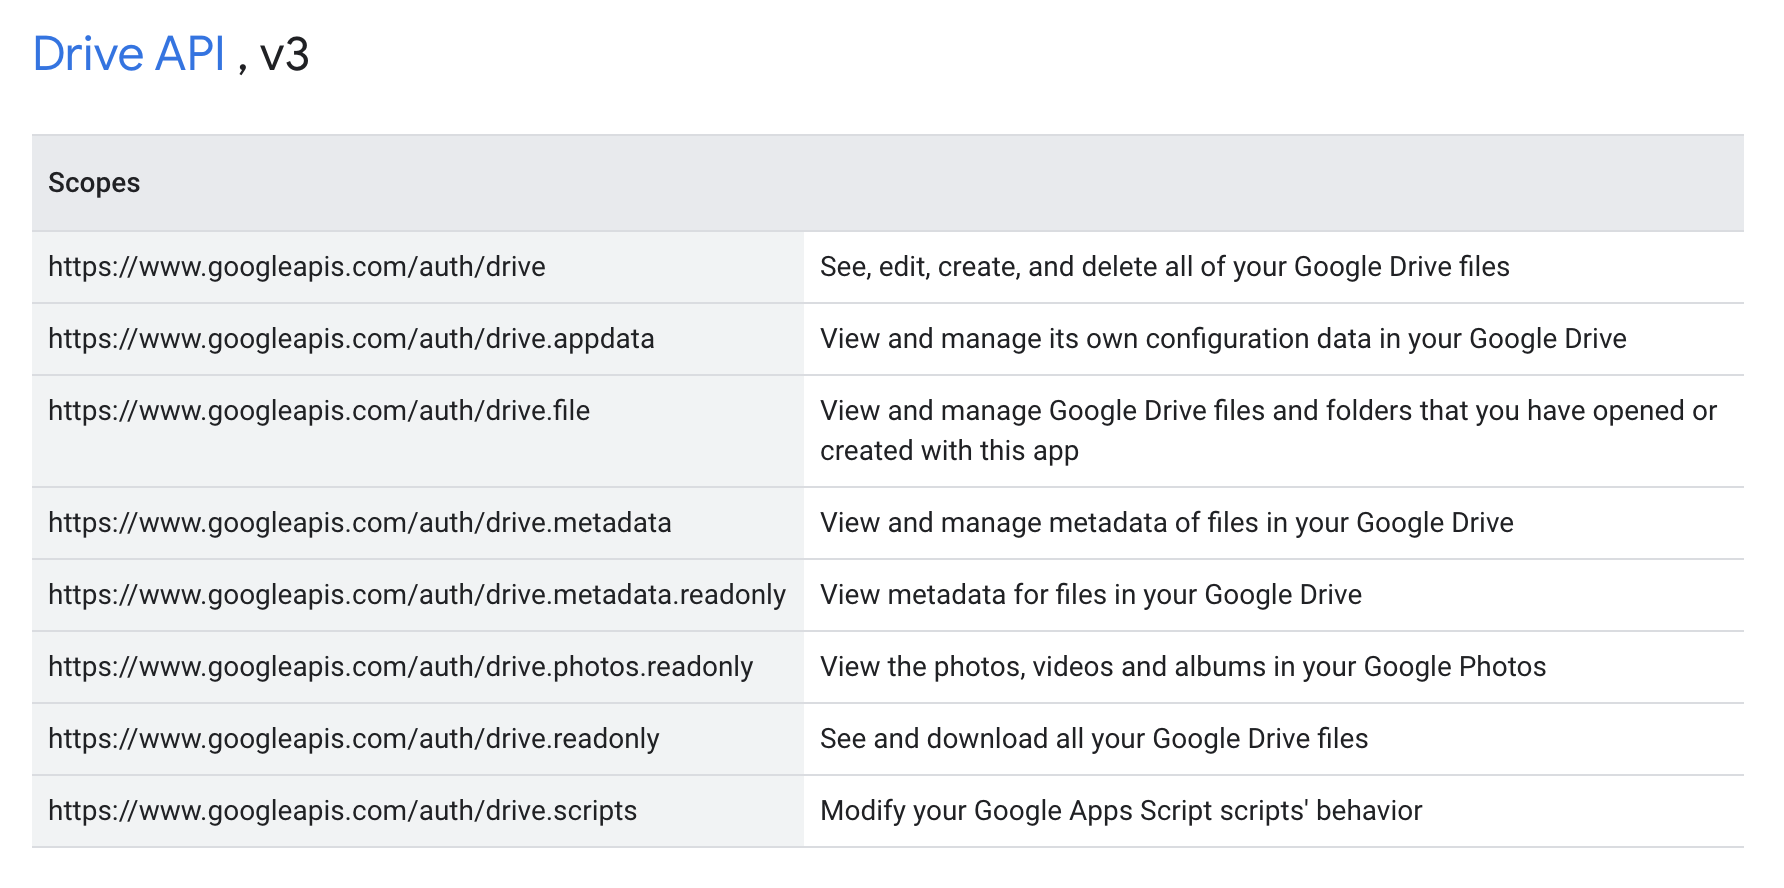

In [3]:
# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/drive']

### 4. drive service 설정

In [4]:
creds = None
# The file token.pickle stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        creds = pickle.load(token)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

drive_service = build('drive', 'v3', credentials=creds)

### 5. Drive 목록 확인하기

In [ ]:
# Call the Drive v3 API
results = drive_service.files().list(
    pageSize=10, fields="nextPageToken, files(id, name)").execute()
items = results.get('files', [])

if not items:
    print('No files found.')
else:
    print('Files:')
    for item in items:
        print(u'{0} ({1})'.format(item['name'], item['id']))

### 6. 파일 다운로드

In [5]:
import io
import googleapiclient.http

In [11]:
file_id = '1CxyOEsBcNZl7OhCdkHKLN1wIskZKWZb3'
request = drive_service.files().get_media(fileId=file_id)
fh = io.BytesIO()
downloader = googleapiclient.http.MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))

Download 100%.


### 7. Pillow 연결 확인

- PC로 다운로드를 원하면 이 유튜브 확인!
https://www.youtube.com/watch?v=FzH_F6e2CJE&t=275s

In [46]:
from PIL import Image,ImageDraw,ImageFont
import os

In [42]:
target_image = Image.open(fh)

In [43]:
target_image.save('/Users/shinyehjin/Programming/Dongjoo/짱짱.jpeg')